<center> <img src="https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>
   
<center> <font color= #555555> <font size = 4> November 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/if720960/MYST-Modulo_1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Module 4 </font> <br> <br> <font color= #555555> <font size = 5>  </font>

<center> <font color= #555555> <font size = 4> Paola Gómez Manzano </a> | <font color= #555555> <font size = 4> Xavier Perez Balcorta </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 1. Install/Load Packages and Depedencies </font>

In [358]:
import ccxt
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
from datetime import date
from datetime import datetime, timedelta
import MetaTrader5 as mt5
import calendar
import matplotlib.pyplot as plt
import functions as fn

# <font color= #6B6B6B> 1.2 Verificación de avance </font>

Para esta sección se importó el libro de ordenes de 3 API´s diferentes con 3 monedas diferentes. Las monedas elegidas fueron:
- Bitcoin/USDT
- Ethereum/USDT
- Doge/USDT

Las 3 API´s elegidas fueron
- Binance
- Bitfinex
- Bitmart

Para la realización del laboratorio se necesitaron datos adicionales como OHLC (Open, High, Low, Close) de las 3 monedas así como realizar cálculos adicionales como spread y VWAP.

Finalmente, se decidió correr el diccionario durante 1800 segundos (30 minutos) debido a que en las pruebas la computadora tarda el doble de tiempo en procesarlo.

In [ ]:
z = fn.diccionario(1800) #tiempo en segundos

In [420]:
z # diccionario que contiene toda la información

{'Binance': {'2022-11-10T19:18:19.115Z': {'Coin': 'BTC/USDT',
   'Ask': 17305.87,
   'Bid': 17304.74,
   'Ask_Volume': 3.1443499999999998,
   'Bid_Volume': 1.82662,
   'Level': 30,
   'Spread': 1.1299999999973807,
   'Close_Price': 17309.22,
   'Mid_Price': 17326.02,
   'VWAP': 17304.31401380414},
  '2022-11-10T19:18:20.481Z': {'Coin': 'ETH/USDT',
   'Ask': 1273.89,
   'Bid': 1273.88,
   'Ask_Volume': 42.5239,
   'Bid_Volume': 95.45369999999998,
   'Level': 30,
   'Spread': 0.009999999999990905,
   'Close_Price': 1273.89,
   'Mid_Price': 1275.0,
   'VWAP': 1274.199338885442},
  '2022-11-10T19:18:21.643Z': {'Coin': 'DOGE/USDT',
   'Ask': 0.08813,
   'Bid': 0.08812,
   'Ask_Volume': 3827671.0,
   'Bid_Volume': 2910192.0,
   'Level': 30,
   'Spread': 9.999999999996123e-06,
   'Close_Price': 0.08814,
   'Mid_Price': 0.08822,
   'VWAP': 0.08812523347832986},
  '2022-11-10T19:18:43.717Z': {'Coin': 'BTC/USDT',
   'Ask': 17290.58,
   'Bid': 17289.66,
   'Ask_Volume': 1.10311,
   'Bid_Volume': 

# <font color= #6B6B6B> 2. Visualización de Microestructura </font> 

In [ ]:
df = fn.dataframe(z) # función para acomodar de manera visual el diccionario

In [421]:
df

,Exchange,TimeStamp,Coin,Ask_Volume,Bid_Volume,Total_volume,Level,Mid_Price,VWAP
0,Binance,2022-11-10T19:18:19.115Z,BTC/USDT,3.14435,1.82662,4.97097,30,17326.02,17304.314014
1,Binance,2022-11-10T19:18:20.481Z,ETH/USDT,42.5239,95.4537,137.9776,30,1275.0,1274.199339
2,Binance,2022-11-10T19:18:21.643Z,DOGE/USDT,3827671.0,2910192.0,6737863.0,30,0.08822,0.088125
3,Binance,2022-11-10T19:18:43.717Z,BTC/USDT,1.10311,2.64327,3.74638,30,17326.02,17291.985688
4,Binance,2022-11-10T19:18:44.970Z,ETH/USDT,57.9527,83.7374,141.6901,30,1275.81,1272.125862
...,...,...,...,...,...,...,...,...,...
211,Bitmart,2022-11-10T19:27:58.473Z,ETH/USDT,608.78003,610.28685,1219.06688,30,1280.25,1280.216463
212,Bitmart,2022-11-10T19:27:59.000Z,DOGE/USDT,1572431.0,979937.0,2552368.0,30,0.089091,0.088858
213,Bitmart,2022-11-10T19:28:20.667Z,BTC/USDT,68.19962,29.05103,97.25065,30,17372.33,17318.507849
214,Bitmart,2022-11-10T19:28:24.622Z,ETH/USDT,386.5006,195.664,582.1646,30,1281.0,1276.714567


Este dataframe nos presenta de la mejor manera la microestructura de los libros de ordenes, sus niveles, su volumen de bid y de ask así como el Mid Price de la moneda y su VWAP.

# <font color= #6B6B6B> 2.4. Visualizaciones </font> 

In [ ]:
binance = fn.dataframebin(z)
bitmart = fn.dataframebit(z)
bitfinex = fn.dataframefinex(z)

In [ ]:
binanceBTC = fn.binanceBTCcoin(binance)
binanceETH = fn.binanceETHcoin(binance)
binanceDOGE = fn.binanceDOGEcoin(binance)

bitfinexBTC = fn.bitfinexBTCcoin(binance)
bitfinexETH = fn.bitfinexETHcoin(binance)
bitfinexDOGE = fn.bitfinexDOGEcoin(binance)

bitmartBTC = fn.bitmartBTCcoin(binance)
bitmartETH = fn.bitmartETHcoin(binance)
bitmartDOGE = fn.bitmartDOGEcoin(binance)

In [ ]:
xg=binanceBTC['TimeStamp']
yg=binanceBTC['Mid_Price']
xb=bitfinexBTC['TimeStamp']
yb=bitfinexBTC['Mid_Price']
xm=bitmartBTC['TimeStamp']
ym=bitmartBTC['Mid_Price']

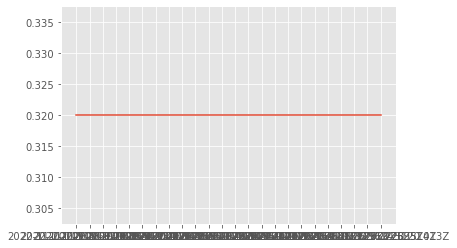

In [422]:
plt.plot(xb,yb) #Bitfinex

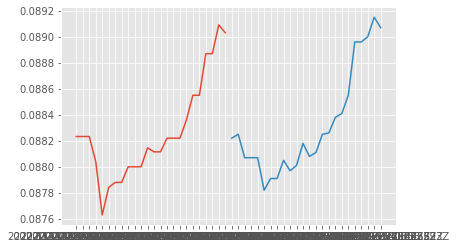

In [423]:
plt.plot(xm,ym) #Binance
plt.plot(xg,yg) #Bitmart

In [ ]:
xg=binanceETH['TimeStamp']
yg=binanceETH['Mid_Price']
xb=bitfinexETH['TimeStamp']
yb=bitfinexETH['Mid_Price']
xm=bitmartETH['TimeStamp']
ym=bitmartETH['Mid_Price']

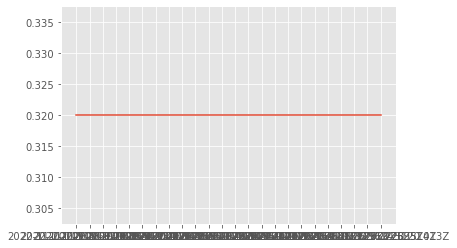

In [424]:
plt.plot(xb,yb) #Bitfinex

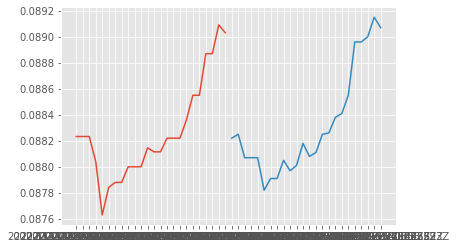

In [425]:
plt.plot(xm,ym) #Binance
plt.plot(xg,yg) #Bitmart

In [ ]:
xg=binanceDOGE['TimeStamp']
yg=binanceDOGE['Mid_Price']
xb=bitfinexDOGE['TimeStamp']
yb=bitfinexDOGE['Mid_Price']
xm=bitmartDOGE['TimeStamp']
ym=bitmartDOGE['Mid_Price']

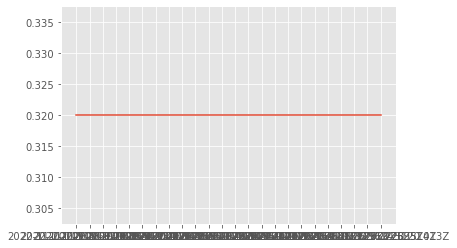

In [426]:
plt.plot(xb,yb) #Bitfinex

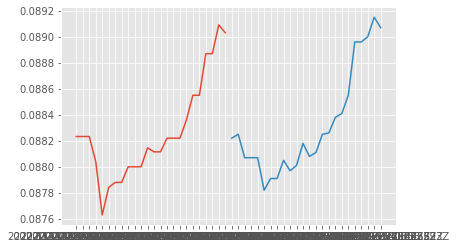

In [427]:
plt.plot(xm,ym) #Binance
plt.plot(xg,yg) #Bitmart

# <font color= #6B6B6B> 3. Modelado de Microestructura </font> 

In [ ]:
df_complete = fn.effective_spread(binanceBTC,binanceETH,binanceDOGE,bitfinexBTC,bitfinexETH,bitfinexDOGE,bitmartBTC,bitmartETH,bitmartDOGE)

In [428]:
df_complete

,Exchange,TimeStamp,Coin,Spread,Close_Price,diff,Effective_Spread
0,Binance,2022-11-10T19:18:19.115Z,BTC/USDT,1.13,17309.22,0.000000,0.000000
1,Binance,2022-11-10T19:18:43.717Z,BTC/USDT,0.92,17290.87,-18.350000,31.498347
2,Binance,2022-11-10T19:19:07.345Z,BTC/USDT,0.71,17283.35,-7.520000,40.070197
3,Binance,2022-11-10T19:19:31.216Z,BTC/USDT,1.8,17278.12,-5.230000,42.767317
4,Binance,2022-11-10T19:19:57.200Z,BTC/USDT,1.9,17238.46,-39.660000,45.104314
...,...,...,...,...,...,...,...
19,Bitmart,2022-11-10T19:26:37.909Z,DOGE/USDT,0.000046,0.08855,0.000000,0.000000
20,Bitmart,2022-11-10T19:27:05.266Z,DOGE/USDT,0.000073,0.08887,0.000320,0.000000
21,Bitmart,2022-11-10T19:27:32.719Z,DOGE/USDT,0.00006,0.08887,0.000000,0.000000
22,Bitmart,2022-11-10T19:27:59.000Z,DOGE/USDT,0.000033,0.089087,0.000217,0.000000


Finalmente podemos observar la microestructura, los diferentes spread de cada moneda respecto a su spread y como varian con cada exchange API.